In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
plt.figure(figsize=(20, 13))
sns.set(font_scale=1.5)

plt.rc('font',family='Times New Roman',size=12)

<Figure size 1440x936 with 0 Axes>

In [13]:
df = pd.read_csv('census.csv')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


<AxesSubplot:>

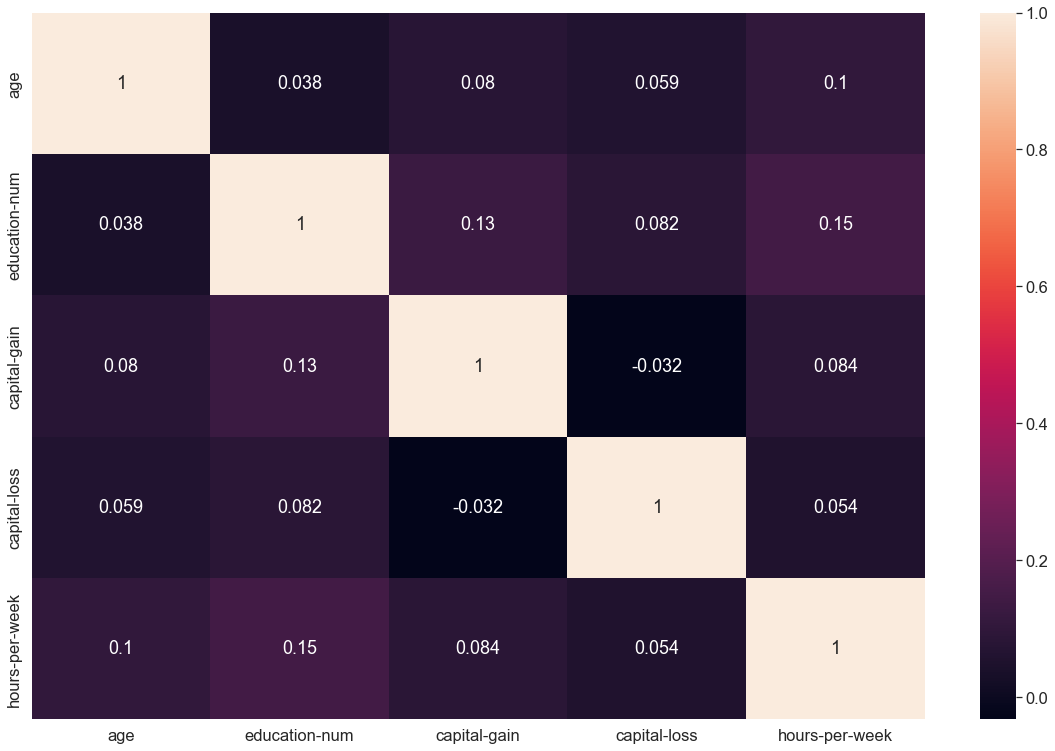

In [14]:
plt.figure(figsize=(20, 13))
sns.set(font_scale=1.5)

df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [15]:
df_gain_nonzero = df[df['capital-gain'] != 0]

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

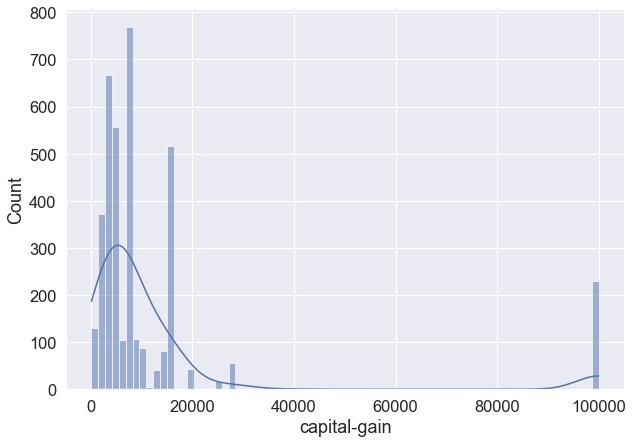

In [16]:
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.5)
sns.histplot(df_gain_nonzero['capital-gain'], kde = True)

<AxesSubplot:>

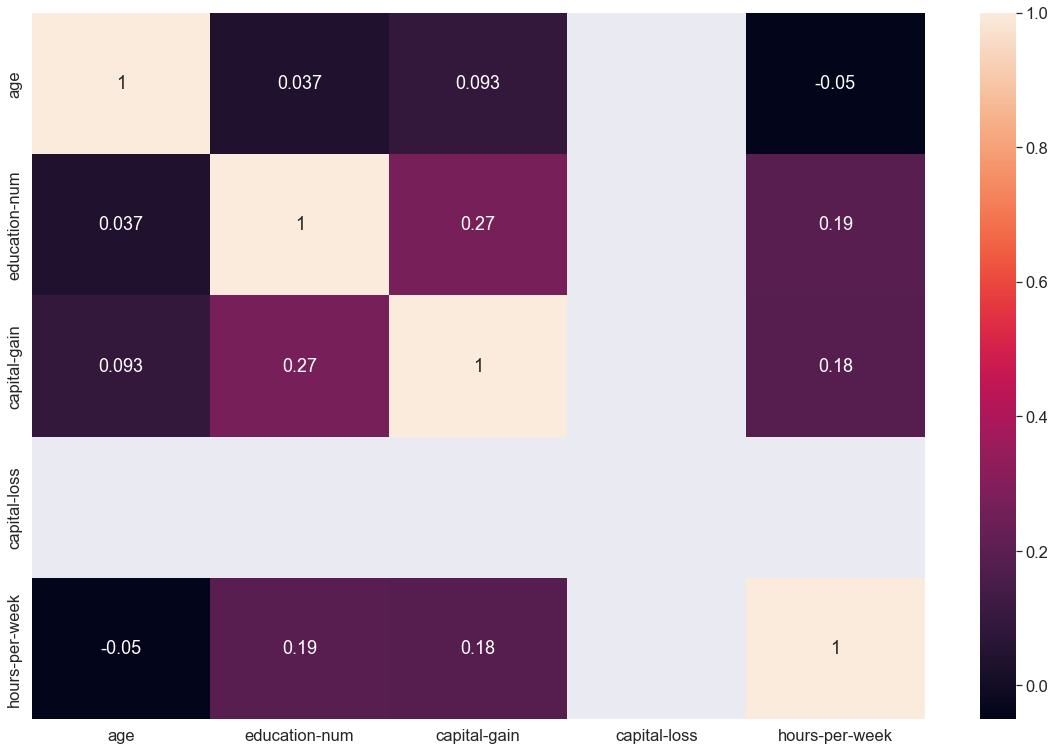

In [17]:
plt.figure(figsize = (20, 13))
sns.set(font_scale = 1.5)
sns.heatmap(df_gain_nonzero.corr(), annot=True)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

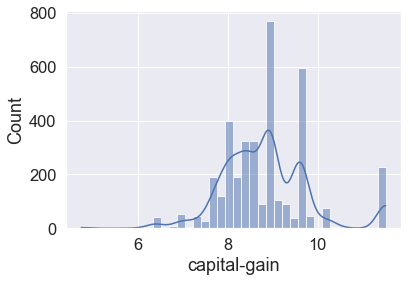

In [18]:
df_gain = df[df['capital-gain'] != 0]
sns.histplot(np.log(df_gain['capital-gain']), kde = True)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

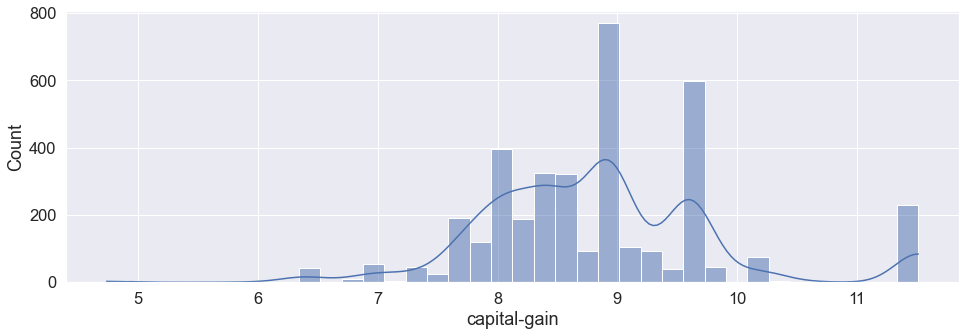

In [19]:
plt.figure(1)
plt.figure(figsize = (16, 5))
sns.histplot(np.log(df['capital-gain']), kde = True)

<AxesSubplot:>

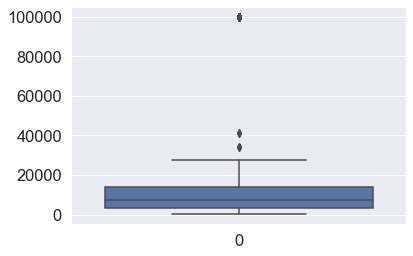

In [20]:
df_gain = df[df['capital-gain'] != 0]
sns.boxplot(df_gain['capital-gain'])

<AxesSubplot:>

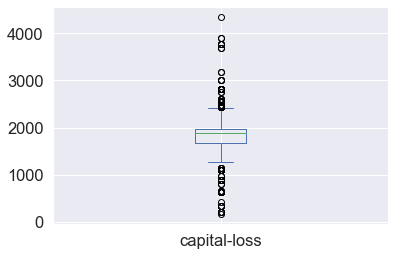

In [21]:
df_loss = df[df['capital-loss'] != 0]
df_loss['capital-loss'].plot.box()

<AxesSubplot:>

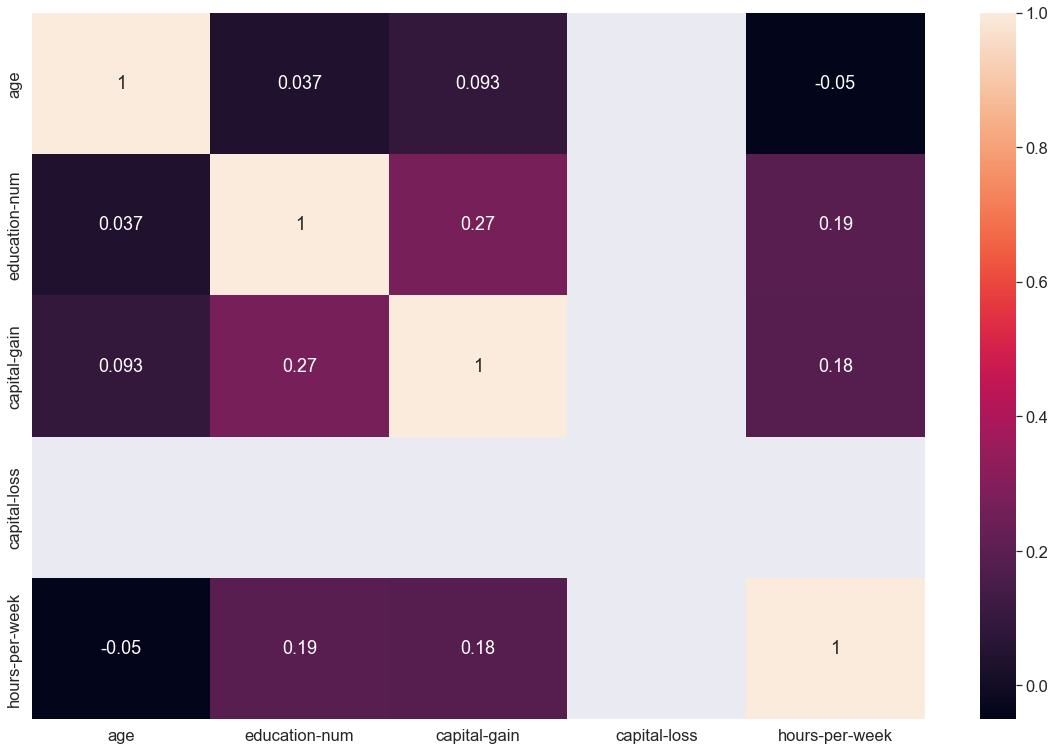

In [22]:
plt.figure(figsize = (20, 13))
sns.set(font_scale = 1.5)
sns.heatmap(df_gain.corr(), annot = True)

In [23]:
df['workclass'] = LabelEncoder().fit_transform(df['workclass'])
df['education_level'] = LabelEncoder().fit_transform(df['education_level'])
df['marital-status'] = LabelEncoder().fit_transform(df['marital-status'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['relationship'] = LabelEncoder().fit_transform(df['relationship'])
df['race'] = LabelEncoder().fit_transform(df['race'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['native-country'] = LabelEncoder().fit_transform(df['native-country'])
df['income'] = LabelEncoder().fit_transform(df['income'])
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [33]:
from sklearn import *
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [26]:
Y = df['income']
X = df.drop('income', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [30]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB()

In [59]:
y_prediction = model_GNB.predict(X_test) 

print(metrics.accuracy_score(y_prediction, y_test))

0.7970149253731343


In [50]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pre_tree = model_tree.predict(X_test)

print(metrics.accuracy_score(y_pre_tree, y_test))

0.8139303482587065


In [55]:
def test(model):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
    
    model.fit(X_train, y_train)
    
    y_pre = model.predict(X_test)
    
    return metrics.accuracy_score(y_pre, y_test)

In [56]:
from sklearn.ensemble import *

ada = AdaBoostClassifier()
randomForest = RandomForestClassifier()
print(test(ada))
print(test(randomForest))

0.8542841348811498
0.843338861249309
